In [1]:
!pip install -q qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.7 MB/s eta 0:00:00


In [2]:
!pip install -q qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.32.4 which is incompatible.


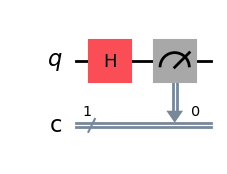

In [6]:
# from qiskit import QuantumCircuit, Aer, execute
# from qiskit.visualization import plot_histogram

from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit.providers.basic_provider import BasicProvider # Changed import

# 1 qubit ve 1 klasik bitlik devre
qc = QuantumCircuit(1, 1)

# Qubit’e Hadamard kapısı uygula (süperpozisyon)
qc.h(0)

# Ölçüm yap
qc.measure(0, 0)

# Devreyi çiz
qc.draw('mpl')

In [10]:
!pip install -q qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.0 MB/s eta 0:00:00


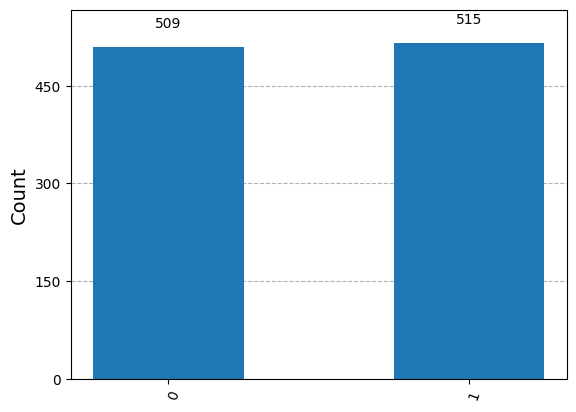

In [22]:
# Simülatör başlat
from qiskit_aer import AerSimulator
from IPython.display import display
import matplotlib.pyplot as plt

simulator = AerSimulator()

# Devreyi çalıştır (1024 kez)
job = simulator.run(qc, shots=1024)
result = job.result()

# Sonuçları al
counts = result.get_counts(qc)
# Çizim için yeni bir figure ve axes oluştur
fig, ax = plt.subplots()
# Histogramı belirli axes üzerine çiz
plot_histogram(counts, ax=ax)

⚙️ Ne yaptık?
Qubit’i başlangıçta |0⟩ halindeydi.

Ona Hadamard (H) kapısı uyguladık → Bu, qubit’i şu hale getirir:

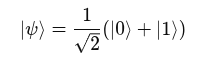


Yani %50 ihtimalle 0, %50 ihtimalle 1 çıkar.

Devreyi 1024 kez çalıştırdık ve histogramda 0 ve 1’in yaklaşık eşit dağıldığını gördük:
509 / 515 — Tam da beklediğimiz gibi!

Hadamard kapısını iki kez uygularsan qubit başlangıç haline döner.

🔍 Neden?

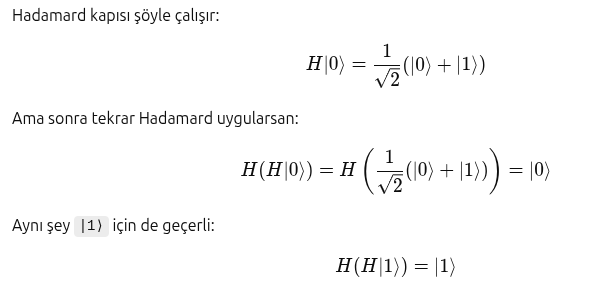

Yani H kapısı kendisinin tersi (unitary inverse) — bu yüzden çift uygulamak başlangıç haline götürür.

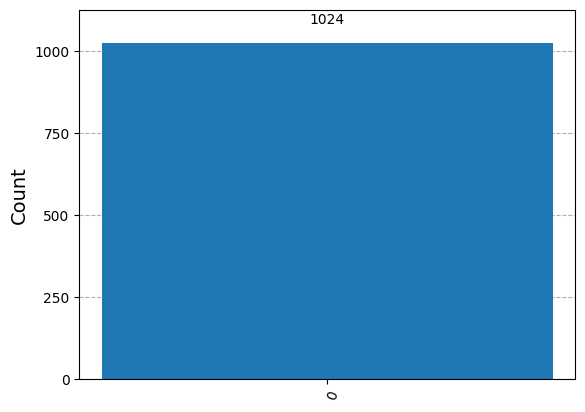

In [24]:
qc = QuantumCircuit(1, 1)

qc.h(0)
qc.h(0)
qc.measure(0, 0)

simulator = AerSimulator()

# Devreyi çalıştır (1024 kez)
job = simulator.run(qc, shots=1024)
result = job.result()

# Sonuçları al
counts = result.get_counts(qc)
# Çizim için yeni bir figure ve axes oluştur
fig, ax = plt.subplots()
# Histogramı belirli axes üzerine çiz
plot_histogram(counts, ax=ax)


## 2 kübitli devreler

Mükemmel! Şimdi kuantum dolaşıklık (entanglement) ile tanışıyoruz. Bu, kuantum algoritmaların kalbindeki sihirli yapı taşlarından biri.

Amaç: Öyle bir devre kuracağız ki, bir qubit ölçüldüğünde diğerinin sonucu da belirlenmiş olacak.

🧰 Devre Adımları:
- Qubit-0’a Hadamard uygula → Süperpozisyon
- Sonra CNOT kapısı: Kontrol = Qubit-0, Hedef = Qubit-1
- Her ikisini ölç

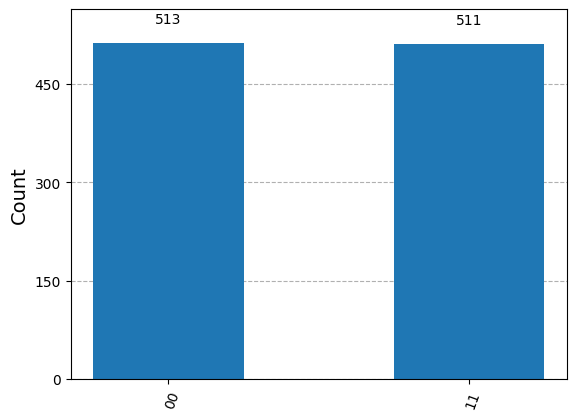

In [25]:
# 2 qubit + 2 klasik bitlik devre
qc = QuantumCircuit(2, 2)

# Qubit-0'a H kapısı → süperpozisyon
qc.h(0)

# Qubit-0 kontrol, Qubit-1 hedef → dolaşıklık
qc.cx(0, 1)

# Ölçümler
qc.measure(0, 0)
qc.measure(1, 1)

# Simülasyon
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()

# Sonuçları al
counts = result.get_counts(qc)
# Çizim için yeni bir figure ve axes oluştur
fig, ax = plt.subplots()
# Histogramı belirli axes üzerine çiz
plot_histogram(counts, ax=ax)

Mükemmel! Beklediğimiz sonucu aynen almışsın:

Sadece 00 ve 11 çıktı.

Yani ya ikisi de 0, ya da ikisi de 1.

🧠 Neden böyle oldu?
|0⟩ → Hadamard → (|0⟩ + |1⟩) / √2

Sonra CNOT ile ikinci qubit’i ilkine bağladık:

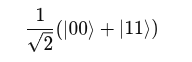

Bu Bell durumu olarak bilinir.
Ve buradaki özellik şu:

❗ Qubit’lerden biri ölçüldüğünde, diğeri anında aynı sonucu verir — aralarında mesafe olsa bile. İşte bu: kuantum dolaşıklık.

🔁 Kısa Özet:
H + CNOT kombinasyonu = dolaşıklık üretir.

Bell durumu: (|00⟩ + |11⟩) / √2

Bu yapı, kuantum algoritmaların ve iletişimin temel taşıdır (örn. teleportation, QKD).






## Deutsch-Jozsa Algo

Şimdi hazırsan bu entanglement fikrini kullanan ilk temel algoritmaya geçebiliriz:

🎯 Deutsch-Jozsa Algoritması – klasik bilgisayarın O(2ⁿ) denemeyle çözeceği bir problemi, Qiskit ile 1 ölçümde çözeceğiz.


🔍 Problem:
Bir fonksiyonumuz var:
𝑓
:
{
0
,
1
}
𝑛
→
{
0
,
1
}
f:{0,1}^
n
 →{0,1}

Bu fonksiyon ya:

Sabit (constant): tüm girişler için aynı sonucu verir (hep 0 ya da hep 1),
veya

Dengeli (balanced): yarısı 0, yarısı 1 döndürür.

🧠 Ama biz fonksiyonu bilmiyoruz.
Klasik bilgisayarla tüm girdileri deneriz — bu eksponansiyel zaman alır.

⚡ Quantum ile hedefimiz:
Tek bir çalıştırma ile bu fonksiyonun sabit mi dengeli mi olduğunu belirlemek.

🧱 Plan:
2 qubit kullanacağız (şimdilik 1 input qubit, 1 yardımcı qubit)

Başlangıç: |0⟩|1⟩

H kapıları ile süperpozisyon

Oracle (sahte fonksiyon) uygula

Tekrar H kapısı

Ölçüm → sonuç 0 ise fonksiyon sabit, 1 ise dengeli



Aşağıdaki kod, f(x) = x gibi dengeli bir fonksiyonu test ediyor:

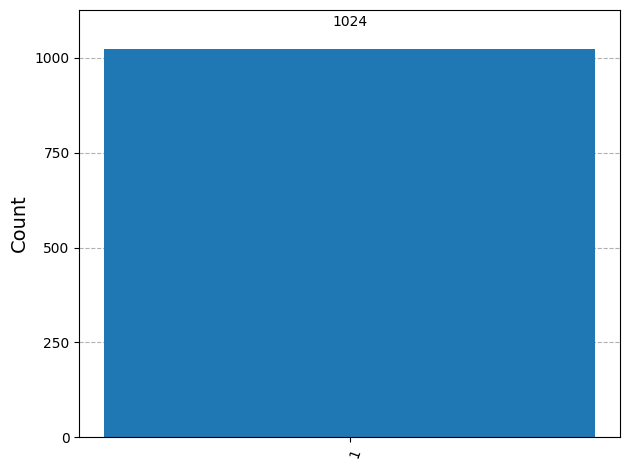

In [26]:

# Devre: 2 qubit, 1 klasik bit
qc = QuantumCircuit(2, 1)

# Başlangıç: |0⟩|1⟩ → yardımcı qubit’e X kapısı
qc.x(1)

# Süperpozisyon
qc.h(0)
qc.h(1)

# --- ORACLE: f(x) = x ---
qc.cx(0, 1)

# Hadamard tekrar input qubit’e
qc.h(0)

# Ölçüm input qubit’i
qc.measure(0, 0)

# Çalıştır
simulator = AerSimulator()
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
# plt.show()

Şimdi f(x) = 0 gibi sabit bir fonksiyonun Deutsch-Jozsa oracle’ını yazalım.
Bu sefer ne bekliyoruz?
→ Histogramda sadece 0 sonucu.

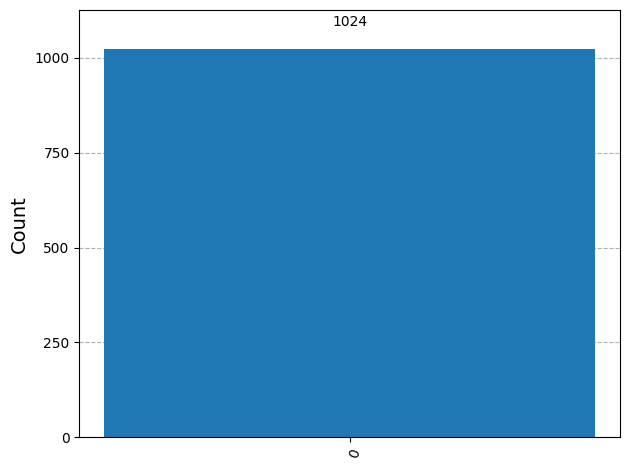

In [28]:
# Devre: 2 qubit, 1 klasik bit
qc = QuantumCircuit(2, 1)

# Başlangıç: |0⟩|1⟩
qc.x(1)

# Süperpozisyon
qc.h(0)
qc.h(1)

# --- ORACLE: f(x) = 0 (hiçbir işlem yapma) ---

# Hadamard tekrar input qubit’e
qc.h(0)

# Ölçüm
qc.measure(0, 0)

# Çalıştır
sim = AerSimulator()
job = sim.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
